In [1]:
from torchvision.datasets import MNIST
from torch.utils.data import TensorDataset, DataLoader
import torch
from torch import nn
from torch import optim

In [2]:
import numpy as np

In [3]:
from tqdm import tqdm_notebook as tqdm
from matplotlib import pyplot as plt

In [4]:
from DeepGenerativeModels.AutoEncoders import VAE
from DeepGenerativeModels.AutoEncoders import IWAE

In [5]:
import utils

In [6]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [7]:
data = MNIST('mnist', download=True, train=True)
train_data = TensorDataset(data.train_data.view(-1, 28 * 28).float() / 255, data.train_labels)
data = MNIST('mnist', download=True, train=False)
test_data = TensorDataset(data.test_data.view(-1, 28 * 28).float() / 255, data.test_labels)

# Обучение

## VAE

In [8]:
model = VAE(2, 28*28, device=device)

In [9]:
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [10]:
utils.trainer(model = model, 
        optimizer = optimizer, 
        dataset = train_data, 
        count_of_epoch = 1,
        batch_size = 64,
        callback = None,
        progress = tqdm)

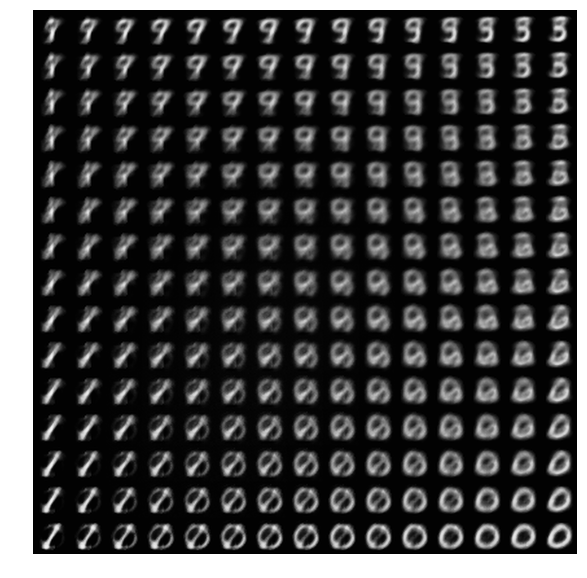

In [11]:
figure = utils.draw_samples_grid_vae(model)

plt.figure(figsize=(10, 10))
plt.imshow(figure, cmap='Greys_r', vmin=0, vmax=1, interpolation='lanczos')
plt.axis('off')
plt.show()

## IWAE

In [8]:
model = IWAE(2, 28*28, K = 2, device=device)

In [9]:
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [10]:
utils.trainer(model = model, 
                optimizer = optimizer, 
                dataset = train_data, 
                count_of_epoch = 1,
                batch_size = 64,
                callback = None,
                progress = tqdm)

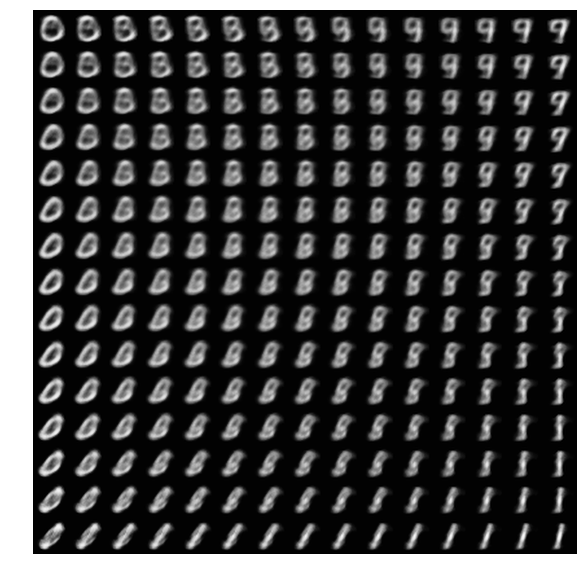

In [11]:
figure = utils.draw_samples_grid_vae(model)

plt.figure(figsize=(10, 10))
plt.imshow(figure, cmap='Greys_r', vmin=0, vmax=1, interpolation='lanczos')
plt.axis('off')
plt.show()

# Draw posterior

In [12]:
batch_x, batch_y = list(DataLoader(train_data))[0]

In [13]:
x = np.linspace(-1, 1.0, 20)
y = np.linspace(-1, 1.0, 20)

xx, yy = np.meshgrid(x, y)

probas = np.zeros(xx.shape)
 
for i in tqdm(range(xx.shape[0])):
    for j in range(xx.shape[1]):
        z = torch.Tensor([xx[i,j], yy[i,j]]).view([1, -1])
        probas[i, j] = model.posterior_z(z, batch_x)

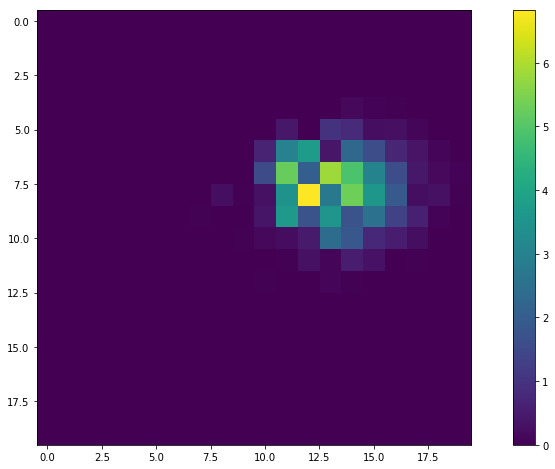

In [14]:
plt.rcParams['figure.figsize'] = (15, 8)

im = plt.imshow(probas)
plt.colorbar(im)
plt.show()